## Desafio Oficina de aprendizado de máquinas da comunidade AI Girls

Grupo C: Ana Maria Bender, Klara Narumi e Larrissa Rocha

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 

from graphviz import render


In [2]:
# importar dados

df_modelo = pd.read_csv('df_modelo.csv')
df_modelo.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


# Modelo arvore de decisão

In [3]:
X = df_modelo.drop(['G1','G2','G3'], axis=1)
Y = df_modelo['G3']

X_social=df_modelo[['activities','freetime','reason','romantic','goout','Dalc','Walc']]
X_family=df_modelo[['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','famsup','nursery','famrel']]
X_demog=df_modelo[['school','sex','age','address','traveltime','studytime','internet','failures','absences','schoolsup','paid','health','higher']]
X_correlacao=df_modelo[['sex','Medu','Fedu','romantic','failures']]

In [4]:
print(X.shape)
print(Y.shape)

(395, 30)
(395,)


## Vamos usar uma arvore de decisão aqui! 

Esse tipo de algoritmo é muito interessante, porque é fácil entender porque ele classificou uma amostra em um determinado valor. Isso porque ele funciona como se fosse feitas uma series de perguntas e então chega-se a uma conclusão.É uma estratégia conhecida como dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema 

Com esse tipo de algoritmo normalmente não precisamos escalar os dados, ele consegue lidar com dados que não são separados linearmente e a importância dos atributos é revelada e fácil de explicar

In [5]:
def arvore_test(X,Y):
# Fit regression model
    regr_1 = DecisionTreeRegressor()
    regr_1.fit(X, Y)

# Predict
    y_pred = regr_1.predict(X)

## Evaluation
    from sklearn.metrics import r2_score # quanto mais proximo de 1 melhor o modelo
    print('r2 score Y e regr_1')
    print(r2_score(Y, regr_1.predict(X)))


    from sklearn.metrics import mean_absolute_error  # desvio médio entre observado e predito.
    print('mean absolute error: Y e y_pred before')
    print(mean_absolute_error(Y, y_pred))

## controlando parametros da arvore
# Fit regression model
    regr_1 = DecisionTreeRegressor(max_depth=4)
    regr_1.fit(X, Y)

# Predict
    y_pred = regr_1.predict(X)
    print('mean absolute error: Y e y_pred')
    print(mean_absolute_error(Y, y_pred))

## treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.35, random_state=42)
    X_test.shape

# Fit regression model
    regr_1 = DecisionTreeRegressor(max_depth=4)
    regr_1.fit(X_train, y_train)

# Predict
    y_pred = regr_1.predict(X_test)
    print('mean absolute error y test e y predito')
    print(mean_absolute_error(y_test, y_pred))

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
    export_graphviz(regr_1, out_file ='tree.dot')  
    render('dot', 'png', 'tree.dot')

# plot tree
    plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
    tree.plot_tree(regr_1, fontsize=8)
    plt.show()

## Feature importance

    importance = regr_1.feature_importances_

# summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    features_n = X.columns
    features_n

# plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
    pyplot.show()
 



r2 score Y e regr_1
1.0
mean absolute error: Y e y_pred before
0.0
mean absolute error: Y e y_pred
2.5898373231211966
mean absolute error y test e y predito
3.5455884312124577


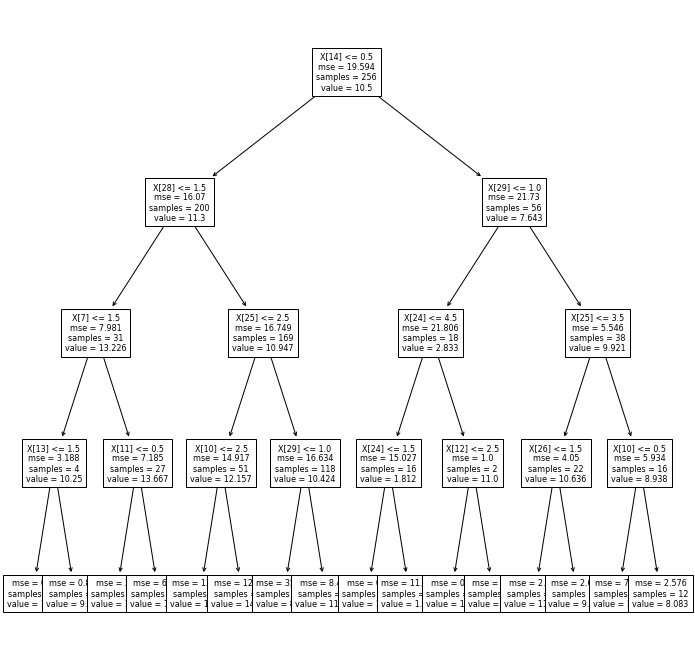

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01936
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.04980
Feature: 11, Score: 0.01590
Feature: 12, Score: 0.00095
Feature: 13, Score: 0.00480
Feature: 14, Score: 0.27861
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.10550
Feature: 25, Score: 0.06366
Feature: 26, Score: 0.01450
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.06478
Feature: 29, Score: 0.38213


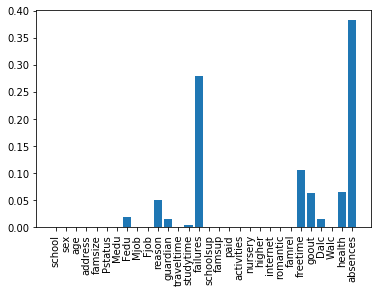

In [6]:
arvore_test(X,Y)

r2 score Y e regr_1
0.39834509484403446
mean absolute error: Y e y_pred before
2.5332159823299065
mean absolute error: Y e y_pred
3.026429634618842
mean absolute error y test e y predito
3.726413155190133


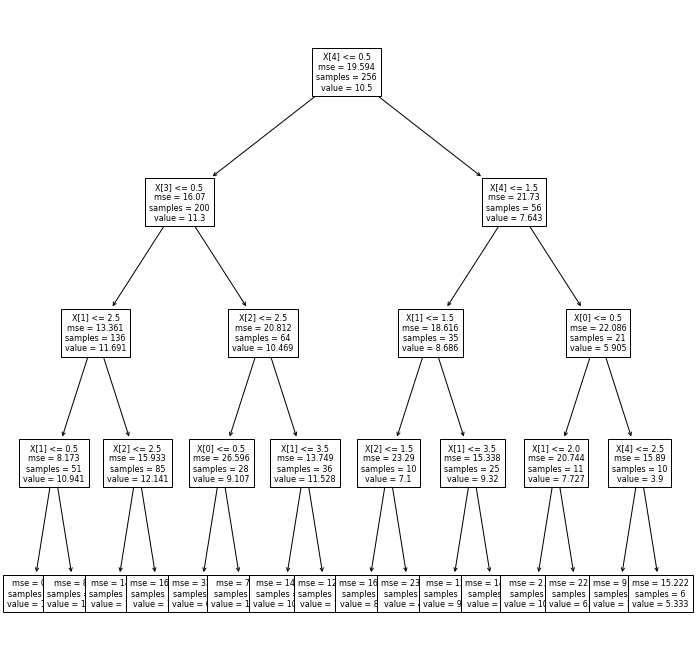

Feature: 0, Score: 0.17276
Feature: 1, Score: 0.13930
Feature: 2, Score: 0.12207
Feature: 3, Score: 0.04703
Feature: 4, Score: 0.51883


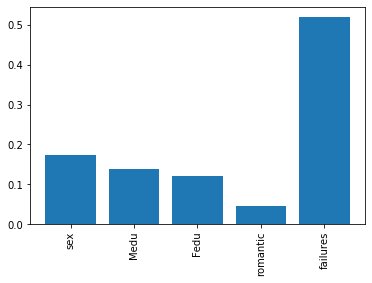

In [7]:
arvore_test(X_correlacao, Y)

r2 score Y e regr_1
0.8590230332284949
mean absolute error: Y e y_pred before
0.7351898734177215
mean absolute error: Y e y_pred
3.199170384024673
mean absolute error y test e y predito
3.9502484120186634


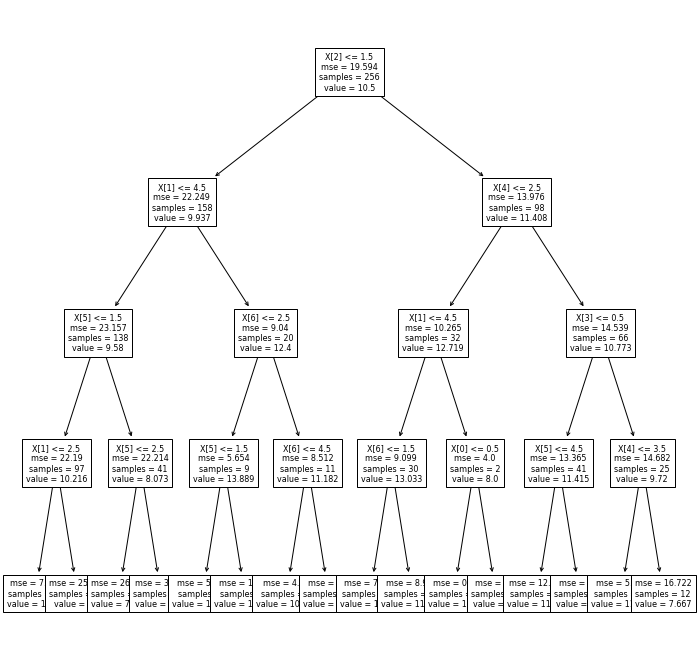

Feature: 0, Score: 0.00753
Feature: 1, Score: 0.31030
Feature: 2, Score: 0.12319
Feature: 3, Score: 0.04196
Feature: 4, Score: 0.16830
Feature: 5, Score: 0.26845
Feature: 6, Score: 0.08027


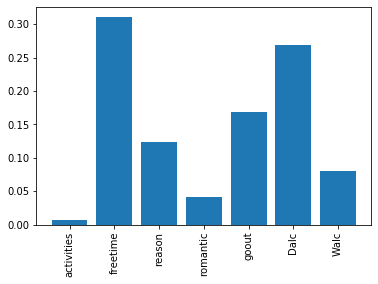

In [8]:
arvore_test(X_social,Y)

r2 score Y e regr_1
0.9339976603704427
mean absolute error: Y e y_pred before
0.37890295358649795
mean absolute error: Y e y_pred
3.18283749206632
mean absolute error y test e y predito
3.8946644881896675


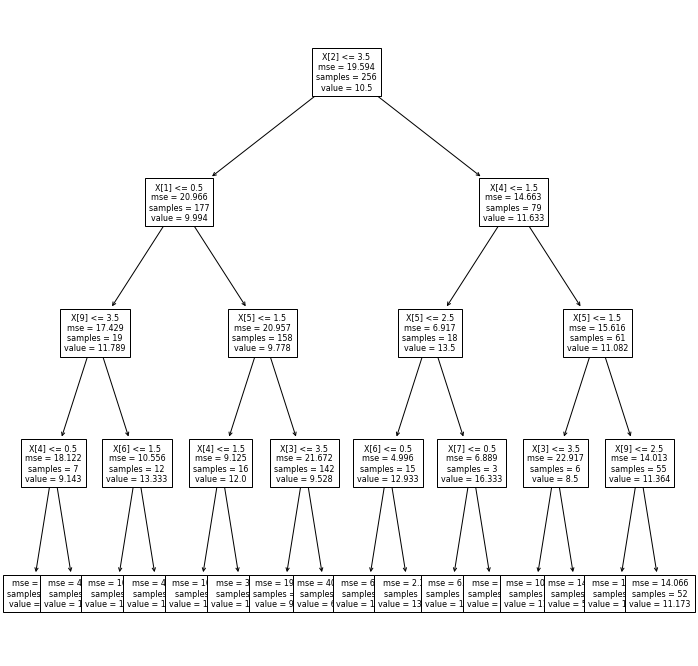

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.07714
Feature: 2, Score: 0.16493
Feature: 3, Score: 0.14942
Feature: 4, Score: 0.24934
Feature: 5, Score: 0.18121
Feature: 6, Score: 0.04254
Feature: 7, Score: 0.00918
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.12624


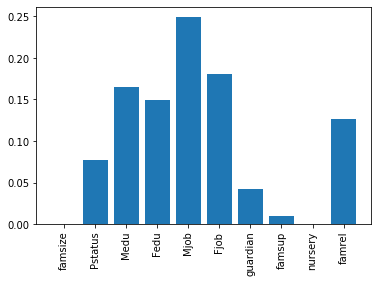

In [9]:
arvore_test(X_family,Y)

r2 score Y e regr_1
0.9857717093806206
mean absolute error: Y e y_pred before
0.12320675105485232
mean absolute error: Y e y_pred
2.748901764792824
mean absolute error y test e y predito
3.313651580444462


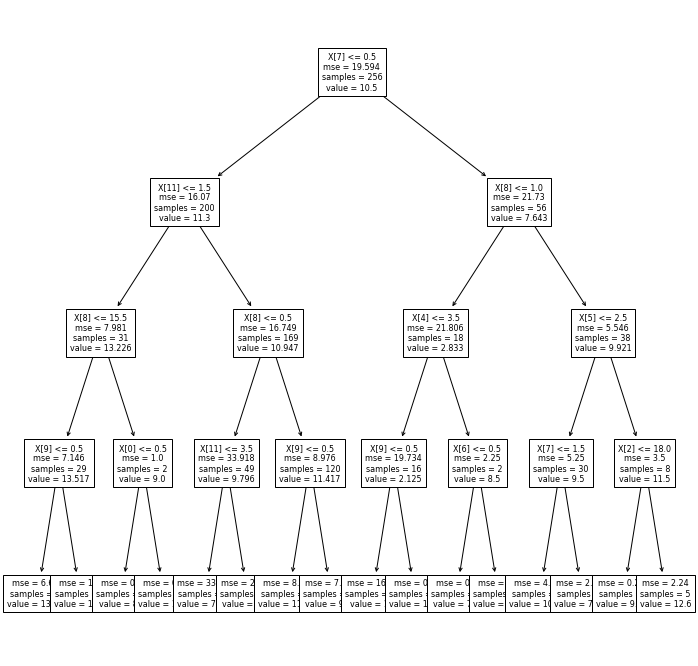

Feature: 0, Score: 0.00099
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00802
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.03593
Feature: 5, Score: 0.01256
Feature: 6, Score: 0.00224
Feature: 7, Score: 0.31248
Feature: 8, Score: 0.36957
Feature: 9, Score: 0.07881
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.17939
Feature: 12, Score: 0.00000


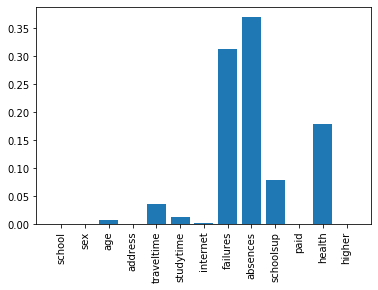

In [10]:
arvore_test(X_demog,Y)